IndexError: index 32 is out of bounds for axis 1 with size 32

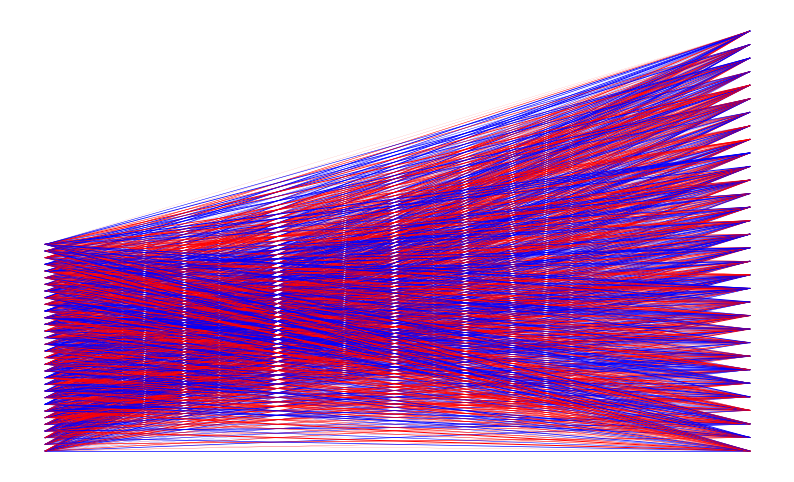

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model(model, to_file='model_plot.png'):
    layers = model.layers
    layer_names = [layer.name for layer in layers]

    fig, ax = plt.subplots(figsize=(100, 100))
    ax.axis('off')

    node_spacing = 500
    node_width = 30
    node_height = 10

    layer_spacing = 1000

    for i, layer in enumerate(layers):
        num_nodes = layer.output_shape[1]

        if i == 0:
            x = 0.5
            y = np.linspace(0.1, 0.9, num_nodes)
        else:
            x = 0.5 + i * layer_spacing
            y = np.linspace(0.1, 0.9, num_nodes)

        for j in range(num_nodes):
            circle = plt.Circle((x, y[j]), 0.02, color='b', fill=True)
            ax.add_artist(circle)

            if i < len(layers) - 1:
                num_nodes_next = layers[i + 1].output_shape[1]
                for k in range(num_nodes_next):
                    line_x = [x + node_width / 2, x + layer_spacing - node_width / 2]
                    line_y = [y[j], np.linspace(0.1, 0.9, num_nodes_next)[k]]
                    ax.plot(line_x, line_y, 'k')

        ax.text(x, 1.02, layer_names[i], ha='center', va='center')

    ax.set_xlim(0, x + layer_spacing)
    ax.set_ylim(0, 1.2)
    plt.savefig(to_file, format='png')
    plt.show()

# Example usage
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(50,)),
    Dense(8, activation='relu'),
    Dense(1)
])

plot_model(model, to_file='model_plot.png')